<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/main/OB_1%EC%A1%B0_%EC%BD%94%EB%93%9C_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [대구 교통사고 피해 예측 AI 경진대회](https://dacon.io/competitions/official/236193/overview/description)

## 0. 필요 패키지 및 데이터 로드

###1. 필요 패키지 로드 및 드라이브 마운트

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#drive mount
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [ ]:
# # 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

###2. 데이터 로드

 대구 보안등 정보 데이터

In [ ]:
light_df = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/데이터/external_open/대구 보안등 정보.csv', encoding='cp949')
light_df.head(3)

,보안등위치명,설치개수,소재지도로명주소,소재지지번주소,위도,경도,설치연도,설치형태
0,대명1동1,1,대구광역시 남구 현충로 155,대구광역시 남구 대명동 1722-4,35.846703,128.579803,2016.0,한전주
1,대명1동2,1,대구광역시 남구 현충로31길 10-1,대구광역시 남구 대명동 1723-11,35.846863,128.579406,2016.0,한전주
2,대명1동3,1,대구광역시 남구 현충로31길 9-8,대구광역시 남구 대명동 1722-56,35.846341,128.579342,2017.0,건축물


In [ ]:
light_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71913 entries, 0 to 71912
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   보안등위치명    71913 non-null  object 
 1   설치개수      71913 non-null  int64  
 2   소재지도로명주소  34646 non-null  object 
 3   소재지지번주소   71913 non-null  object 
 4   위도        43602 non-null  float64
 5   경도        43602 non-null  float64
 6   설치연도      29397 non-null  float64
 7   설치형태      35373 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.4+ MB


대구 어린이 보호구역 정보 데이터

In [ ]:
child_area_df = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/데이터/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949')
child_area_df.head(3)

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23


In [ ]:
child_area_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시설종류      640 non-null    object 
 1   대상시설명     640 non-null    object 
 2   소재지도로명주소  640 non-null    object 
 3   소재지지번주소   555 non-null    object 
 4   위도        640 non-null    float64
 5   경도        640 non-null    float64
 6   관리기관명     640 non-null    object 
 7   관할경찰서명    640 non-null    object 
 8   CCTV설치여부  640 non-null    object 
 9   CCTV설치대수  465 non-null    float64
 10  보호구역도로폭   320 non-null    object 
 11  데이터기준일자   640 non-null    object 
dtypes: float64(3), object(9)
memory usage: 60.1+ KB


대구 주차장 정보

In [ ]:
parking_df = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/데이터/external_open/대구 주차장 정보.csv', encoding='cp949')
parking_df.head(3)

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,추가단위시간,추가단위요금,1일주차권요금적용시간,1일주차권요금,월정기권요금,결제방법,특기사항,위도,경도,데이터기준일자
0,153-2-000001,봉덕공영주차장,공영,노외,대구광역시 남구 중앙대로22길 199,대구광역시 남구 봉덕동 1002-69,62,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842206,128.601725,2020-01-01
1,153-2-000002,봉삼공영주차장,공영,노외,NaN,대구광역시 남구 봉덕동 687-8,36,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,70000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.842811,128.597209,2020-01-01
2,153-2-000003,대명2동공영주차장,공영,노외,대구광역시 남구 중앙대로45길 57,대구광역시 남구 대명동 1803-10,31,1,미시행,평일+토요일+공휴일,...,10.0,200.0,210.0,4000.0,40000.0,현금,"경차,장애인차량,국가유공자차량,승용차요일제차량,저공해차량, 환경친화적 자동차 50 할인.",35.855011,128.589359,2020-01-01


In [ ]:
parking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   주차장관리번호      871 non-null    object 
 1   주차장명         871 non-null    object 
 2   주차장구분        871 non-null    object 
 3   주차장유형        871 non-null    object 
 4   소재지도로명주소     674 non-null    object 
 5   소재지지번주소      775 non-null    object 
 6   주차구획수        871 non-null    int64  
 7   급지구분         871 non-null    int64  
 8   부제시행구분       871 non-null    object 
 9   운영요일         871 non-null    object 
 10  평일운영시작시각     871 non-null    object 
 11  평일운영종료시각     871 non-null    object 
 12  토요일운영시작시각    871 non-null    object 
 13  토요일운영종료시각    871 non-null    object 
 14  공휴일운영시작시각    871 non-null    object 
 15  공휴일운영종료시각    871 non-null    object 
 16  요금정보         871 non-null    object 
 17  주차기본시간       871 non-null    int64  
 18  주차기본요금       871 non-null    int64  
 19  추가단위시간  

대구 cctv 정보

In [ ]:
cctv_df = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/데이터/external_open/대구 CCTV 정보.csv', encoding='cp949')
cctv_df.head(3)

,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0


In [ ]:
cctv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   무인교통단속카메라관리번호  1065 non-null   object 
 1   시도명            1065 non-null   object 
 2   시군구명           1065 non-null   object 
 3   도로종류           1065 non-null   object 
 4   도로노선번호         288 non-null    object 
 5   도로노선명          1065 non-null   object 
 6   도로노선방향         1065 non-null   int64  
 7   소재지도로명주소       905 non-null    object 
 8   소재지지번주소        1063 non-null   object 
 9   위도             1065 non-null   float64
 10  경도             1065 non-null   float64
 11  설치장소           1065 non-null   object 
 12  단속구분           1065 non-null   int64  
 13  제한속도           1065 non-null   int64  
 14  단속구간위치구분       53 non-null     float64
 15  과속단속구간길이       26 non-null     float64
 16  보호구역구분         893 non-null    float64
 17  설치연도           1065 non-null   float64
dtypes: float

훈련데이터, 테스트데이터, 제출파일 만들기

In [ ]:
train_org = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/데이터/train.csv')
test_org = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/데이터/test.csv')
sample_submission = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/데이터/sample_submission.csv')

In [ ]:
train_org.head(3)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3


In [ ]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [ ]:
#train
train_org.describe(include='all')

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609,39609,39609,39609,39609,39609,39609,39609,39609,39609,...,39609,38618,38618,38618,38618,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
unique,39609,18057,7,6,199,11,6,3,14,11,...,6,13,3,97,6,NaN,NaN,NaN,NaN,NaN
top,ACCIDENT_00000,2019-11-15 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,59세,경상,NaN,NaN,NaN,NaN,NaN
freq,1,13,6179,36181,1749,19485,36420,31785,17104,21876,...,29309,20315,27505,867,25034,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.007776,0.262365,1.070085,0.126865,4.726704
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.090109,0.500845,0.992034,0.394670,3.207206
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,6.000000


1. 노면상태가 '건조'인 데이터가 대부분
2. 사고유형이 '차대차'인 데이터가 대부분
3. 기상상태가 '맑음'인 데이터가 대부분


In [ ]:
test_org.head(3)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차


In [ ]:
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
dtypes: object(8)
memory usage: 685.3+ KB


In [ ]:
# test
test_org.describe(include='all')

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
count,10963,10963,10963,10963,10963,10963,10963,10963
unique,10963,5548,7,5,192,11,6,3
top,ACCIDENT_39609,2022-11-10 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차
freq,1,10,1743,10321,422,5039,10394,8559


##1. EDA

In [ ]:
palette = sns.color_palette("pastel")
sns.set_palette(palette=palette)

In [ ]:
plt.rc('font', family = 'NanumGothic')

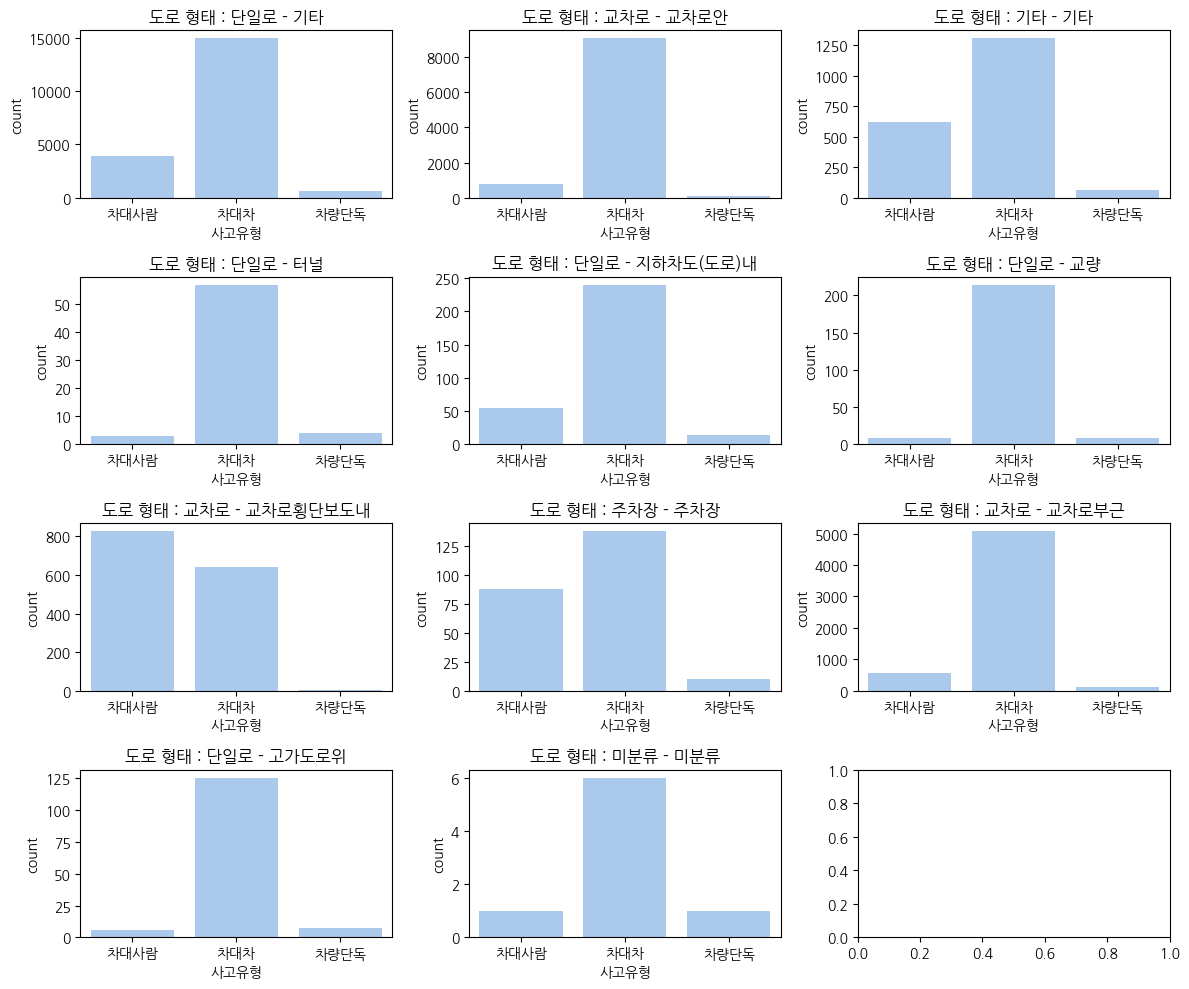

In [ ]:
# 도로 형태별 사고 유형 (count plot)
fig, axes = plt.subplots(4,3, figsize=(12,10))

# x축 label 순서 맞추기
x_order = train_org['사고유형'].unique()

for (ax, k) in zip(axes.flatten(), train_org['도로형태'].unique()):
    sns.countplot(x='사고유형', data=train_org[train_org['도로형태'] == k], ax=ax, order=x_order)
    ax.set_title(f"도로 형태 : {k}")

plt.tight_layout()
plt.show()

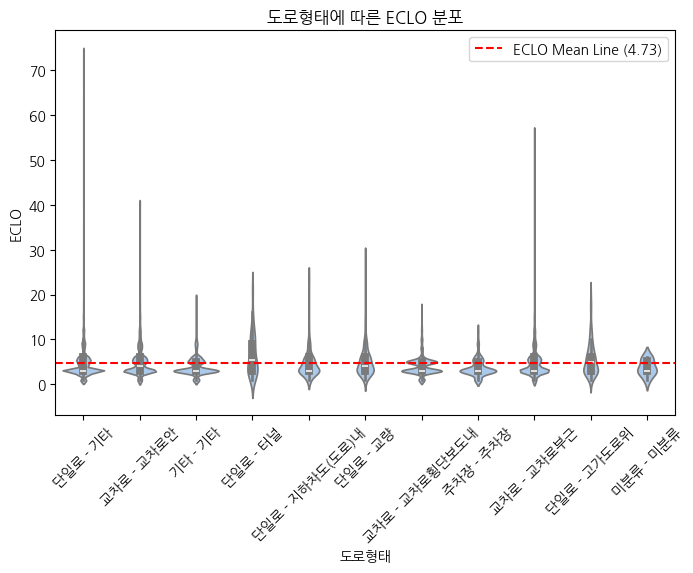

In [ ]:
# 도로 형태/사고유형별 ECLO (violin plot)
plt.figure(figsize=(8,5))
sns.violinplot(x='도로형태', y='ECLO', data=train_org)
avg = train_org['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("도로형태에 따른 ECLO 분포")
plt.show()

-> 단일로 - 터널, 단일로 - 고가도로위 도로형태 주목

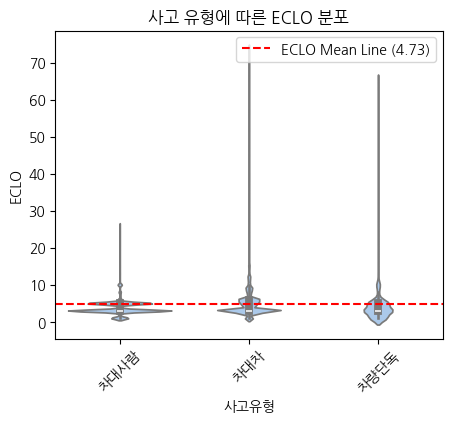

In [ ]:
plt.figure(figsize=(5,4))
sns.violinplot(x='사고유형', y='ECLO', data=train_org)
avg = train_org['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("사고 유형에 따른 ECLO 분포")
plt.show()

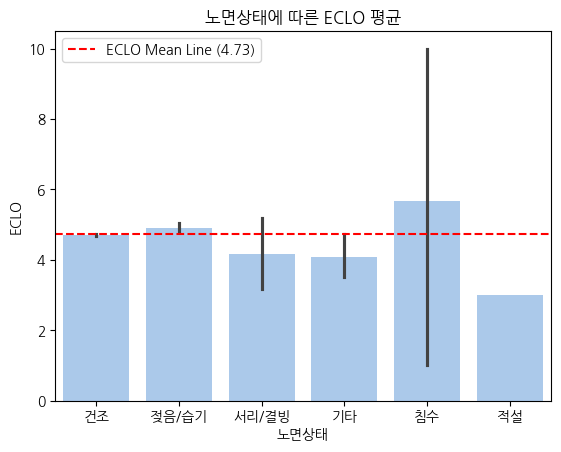

In [ ]:
# 노면상태별 ECLO 평균 (bar plot)
sns.barplot(x='노면상태', y='ECLO', data=train_org)
avg = train_org['ECLO'].mean()
plt.axhline(avg, ls='--', label=f'ECLO Mean Line ({round(avg,2)})', color='r')
plt.legend()
plt.title("노면상태에 따른 ECLO 평균")
plt.show()

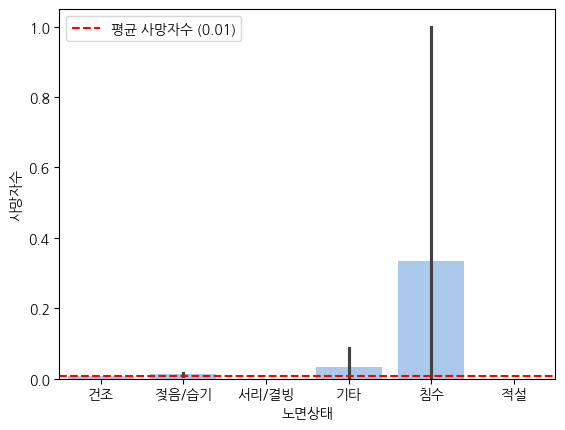

In [ ]:
# 노면상태별 사망자수 평균 (bar plot)
sns.barplot(x='노면상태', y='사망자수', data=train_org)
avg = train_org['사망자수'].mean()
plt.axhline(avg, ls='--', label=f'평균 사망자수 ({round(avg,2)})', color='r')
plt.legend()
plt.show()

-> 노면 상태가 '침수'일때 주목

### 사고 빈도 분석

기상상태 / 사고유형

In [ ]:
count_table = pd.crosstab(train_org['사고유형'],train_org['기상상태'])
count_table.style.background_gradient()

기상상태,기타,눈,맑음,비,안개,흐림
사고유형,,,,,,
차대사람,16,1,6198,480,0,138
차대차,39,5,29130,2032,8,571
차량단독,1,2,853,115,0,20


In [ ]:
## 차대차 사고비율이 언제나 가장 많다
count_table = pd.crosstab(train_org['사고유형'],train_org['기상상태'], normalize='columns')
count_table.style.background_gradient()

기상상태,기타,눈,맑음,비,안개,흐림
사고유형,,,,,,
차대사람,0.285714,0.125000,0.171305,0.182718,0.000000,0.189300
차대차,0.696429,0.625000,0.805119,0.773506,1.000000,0.783265
차량단독,0.017857,0.250000,0.023576,0.043776,0.000000,0.027435


기상상태 / 도로형태

In [ ]:
count_table = pd.crosstab(train_org['도로형태'],train_org['기상상태'])
count_table.style.background_gradient()

기상상태,기타,눈,맑음,비,안개,흐림
도로형태,,,,,,
교차로 - 교차로부근,6,1,5206,419,0,114
교차로 - 교차로안,6,1,9080,661,3,180
교차로 - 교차로횡단보도내,4,2,1310,121,0,37
기타 - 기타,15,0,1839,87,0,45
단일로 - 고가도로위,0,0,118,15,0,5
단일로 - 교량,0,0,206,20,1,5
단일로 - 기타,23,4,17857,1268,4,329
단일로 - 지하차도(도로)내,0,0,282,19,0,8
단일로 - 터널,1,0,59,2,0,2


요일 / ECLO

In [ ]:
train_org['ECLO'].describe()

count    39609.000000
mean         4.726704
std          3.207206
min          1.000000
25%          3.000000
50%          3.000000
75%          6.000000
max         74.000000
Name: ECLO, dtype: float64

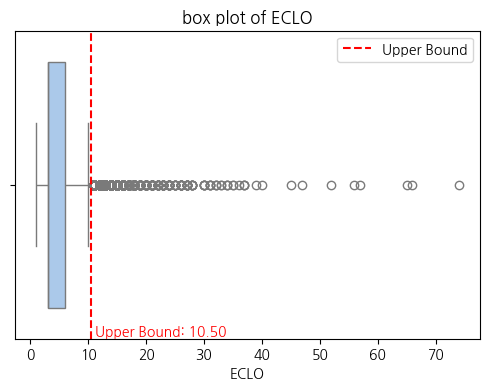

In [ ]:
# ECLO upper bound 구하기

Q1 = train_org['ECLO'].quantile(0.25)
Q3 = train_org['ECLO'].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(6,4))
sns.boxplot(x='ECLO', data=train_org)

plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.text(upper_bound+12, 0.5, f'Upper Bound: {upper_bound:.2f}', color='r', ha='center', va='bottom')
plt.legend()
plt.title("box plot of ECLO")
plt.show()

In [ ]:
# ECLO 10.5를 기준으로 데이터 분리
high_ECLO_df = train_org[train_org['ECLO'] > 10.5]
no_high_ECLO_df = train_org[train_org['ECLO'] <= 10.5]

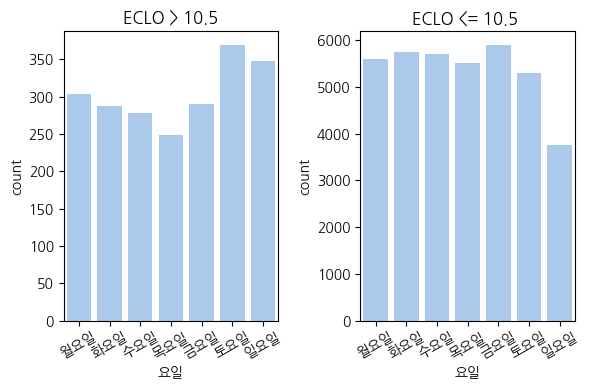

In [ ]:
x_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

fig, axes = plt.subplots(1, 2, figsize=(6,4))
sns.countplot(x='요일', data=high_ECLO_df, order=x_order, ax=axes[0])
sns.countplot(x='요일', data=no_high_ECLO_df, order=x_order, ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

-> ECLO 10.5 이상은 주말 발생 비율이 높다, 10.5 이하는 주말 사고 발생 비율이 더 낮다.

시간 / ECLO

In [ ]:
train_org['사고일시'] = pd.to_datetime(train_org['사고일시'])
train_org['hour'] = train_org['사고일시'].dt.hour

high_ECLO_df = train_org[train_org['ECLO'] > 10.5]
no_high_ECLO_df = train_org[train_org['ECLO'] <= 10.5]

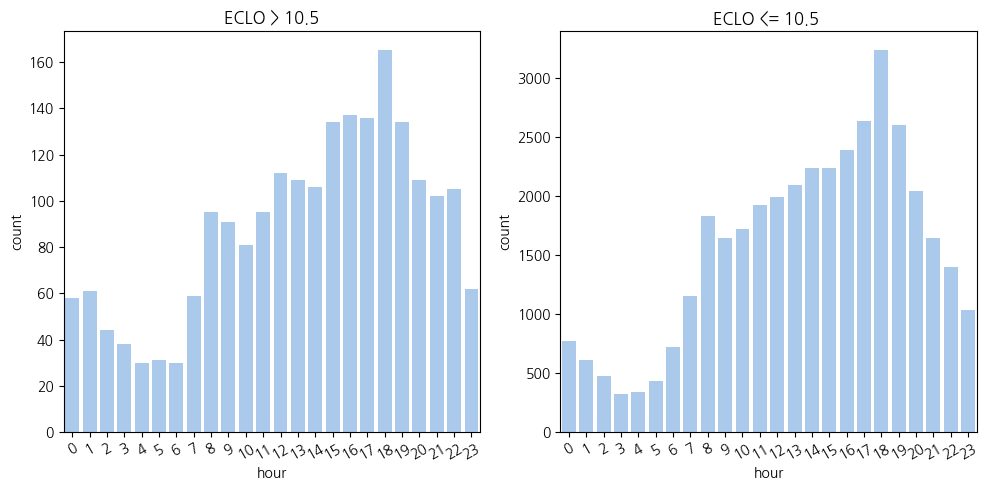

In [ ]:
# 시간별 사고 발생 횟수

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x='hour', data=high_ECLO_df,  ax=axes[0])
sns.countplot(x='hour', data=no_high_ECLO_df,  ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

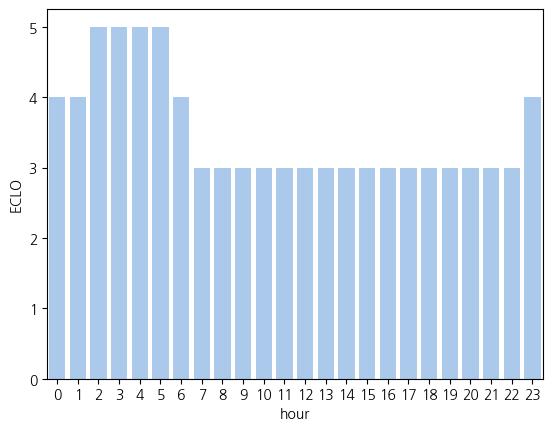

In [ ]:
# 사고 발생 시간대별 ECLO median
sns.barplot(x='hour', y='ECLO', data=train_org, estimator=np.median, errorbar=None)
plt.show()

시간 / 사고형태 / 도로형태

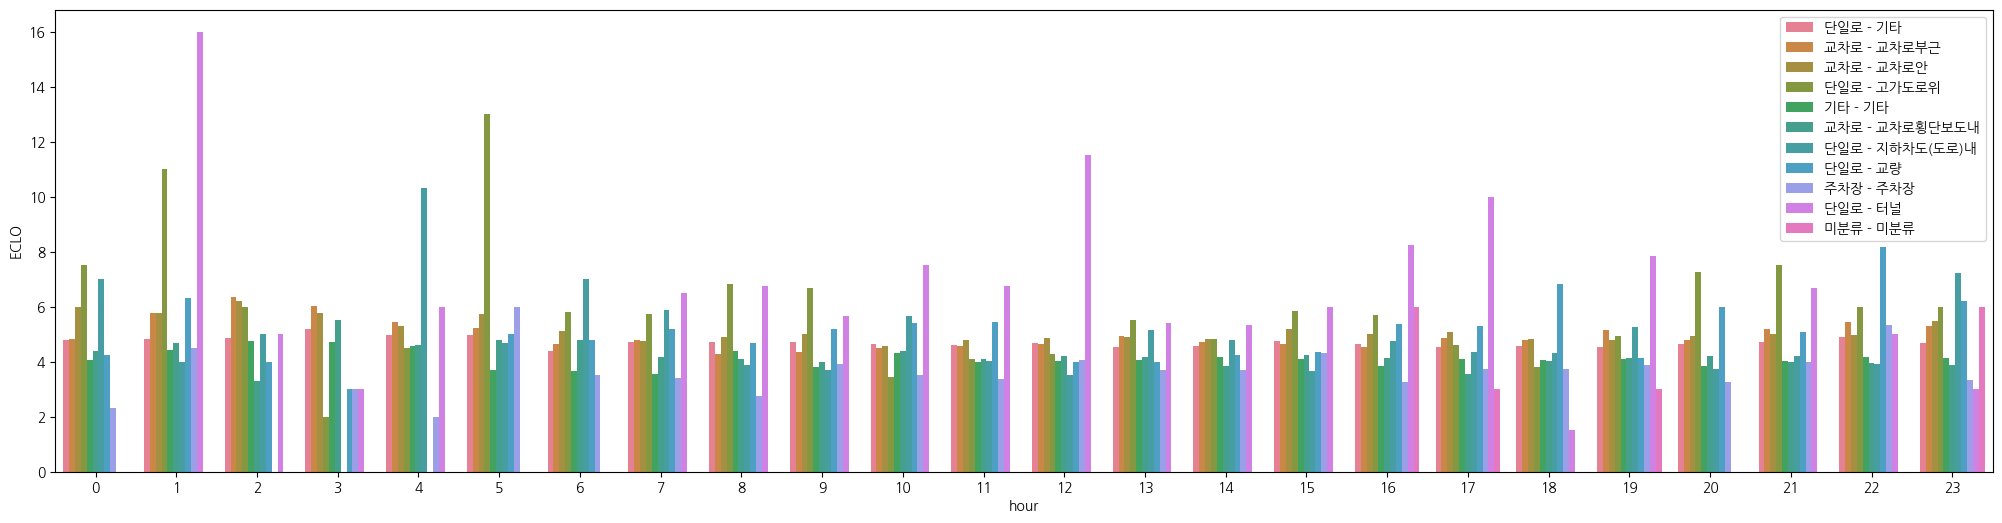

In [ ]:
plt.figure(figsize=(25, 6))
sns.barplot(x='hour', y='ECLO', hue='도로형태', data=train_org, errorbar=None)
plt.legend(loc='upper right')
plt.show()

##2. 데이터 전처리

In [ ]:
# 대구 보안등 정보
# 설치개수 -> 보안등 설치개수로 이름 바꾸기
light_df = light_df.rename(columns={'설치개수': '보안등 설치개수'})

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

# 지번주소를 도시, 구, 동으로 나누기  /  띄어쓰기가 4개니깐 임의로 번지 설정
light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])

light_df = light_df.groupby(['도시', '구', '동']).sum().reset_index()
light_df.reset_index(inplace=True, drop=True)

light_df.head(3)

,도시,구,동,보안등위치명,보안등 설치개수,소재지도로명주소,위도,경도,설치연도,설치형태
0,대구광역시,남구,대명동,대명1동1대명1동2대명1동3대명1동4대명1동5대명1동6대명1동7대명1동8대명1동9대...,5377,대구광역시 남구 현충로 155대구광역시 남구 현충로31길 10-1대구광역시 남구 현...,188288.045338,675412.546828,10592289.0,한전주한전주건축물한전주한전주한전주한전주한전주전용주한전주한전주한전주한전주한전주한전주전...
1,대구광역시,남구,봉덕동,봉덕1동1봉덕1동2봉덕1동3봉덕1동4봉덕1동5봉덕1동6봉덕1동7봉덕1동8봉덕1동9봉...,1424,대구광역시 남구 봉덕로23길 22-5대구광역시 남구 봉덕로23길 16-3대구광역시 ...,49998.926442,179395.015619,2812887.0,한전주한전주건축물한전주한전주건축물한전주한전주한전주한전주한전주한전주한전주한전주건축물한...
2,대구광역시,남구,이천동,이천동1이천동2이천동3이천동4이천동5이천동6이천동7이천동8이천동9이천동10이천동11...,556,대구광역시 남구 명덕로50길 29-31대구광역시 남구 명덕로50길 29-45대구광역...,19754.558391,70859.061083,1110986.0,건축물건축물건축물건축물한전주한전주한전주건축물한전주한전주한전주건축물건축물한전주한전주건...


In [ ]:
# 어린이 보호 구역
# 어린이 보호구역을 의미하는 것만 출력
child_area_df['보호구역'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

# 지번주소를 도시, 구, 동으로 나누기  /  띄어쓰기가 4개니깐 임의로 번지 설정
child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])

child_area_df = child_area_df.groupby(['도시', '구', '동']).sum().reset_index()
child_area_df.reset_index(inplace=True, drop=True)

child_area_df.head()

,도시,구,동,CCTV설치대수,보호구역
0,대구광역시,남구,대명동,106.0,26
1,대구광역시,남구,봉덕동,34.0,8
2,대구광역시,남구,이천동,22.0,6
3,대구광역시,달성군,가창면,0.0,4
4,대구광역시,달성군,구지면,2.0,3


In [ ]:
# 주차장 정보
# 급지구분 변수 원핫인코딩
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

# 지번주소를 도시, 구, 동으로 나누기  /  띄어쓰기가 4개니깐 임의로 번지 설정
parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

parking_df = parking_df.groupby(['도시', '구', '동']).sum().reset_index()
parking_df.reset_index(inplace=True, drop=True)

parking_df.head()

,도시,구,동,급지구분_1,급지구분_2,급지구분_3
0,대구광역시,남구,대명동,20,1,0
1,대구광역시,남구,봉덕동,9,3,0
2,대구광역시,남구,이천동,3,0,0
3,대구광역시,달서구,갈산동,0,0,4
4,대구광역시,달서구,감삼동,0,1,3


In [ ]:
# CCTV 정보
cctv_df = pd.read_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/데이터/external_open/대구 CCTV 정보.csv', encoding='cp949')[['소재지지번주소', '단속구분']]
cctv_df = pd.get_dummies(cctv_df, columns=['단속구분'])   # 단속구분 변수 원핫인코딩

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

# 지번주소를 도시, 구, 동으로 나누기  /  띄어쓰기가 4개니깐 임의로 번지 설정
cctv_df[['도시', '구', '동', '번지']] = cctv_df['소재지지번주소'].str.extract(location_pattern)
cctv_df = cctv_df.drop(columns=['소재지지번주소', '번지'])

cctv_df = cctv_df.groupby(['도시', '구', '동']).sum().reset_index()
cctv_df.reset_index(inplace=True, drop=True)

cctv_df.head()

,도시,구,동,단속구분_1,단속구분_2,단속구분_4,단속구분_99
0,대구,달성군,가창면,2,0,0,0
1,대구,달성군,구지면,1,0,0,0
2,대구,달성군,다사읍,2,6,0,0
3,대구,달성군,옥포읍,3,2,0,1
4,대구,달성군,유가읍,0,2,0,1


In [ ]:
# 훈련데이터, 테스트데이터 복사하기
train_df = train_org.copy()
test_df = test_org.copy()

In [ ]:
# 시군구구별 사고횟수
accident_counts = train_df['시군구'].value_counts().reset_index()
accident_counts.columns = ['시군구', '사고횟수']    # index로 되어있는 변수를 원래대로 시군구로 바꿔주기
accident_counts.head()

,시군구,사고횟수
0,대구광역시 남구 대명동,1749
1,대구광역시 수성구 범어동,1173
2,대구광역시 달서구 상인동,1143
3,대구광역시 서구 비산동,968
4,대구광역시 서구 내당동,938


In [ ]:
location_pattern = r'(\S+) (\S+) (\S+)'

# 띄어쓰기 세개니깐 각각 도시,구,동 설정하기
train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)

# '시군구'별 사고 횟수를 train_df에 매핑하기 위해 '시군구' 컬럼을 기준으로 사고 횟수를 가져옴
train_df['사고발생횟수'] = train_df['시군구'].map(accident_counts.set_index('시군구')['사고횟수'])
train_df = train_df.drop(columns=['시군구'])

test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)

# '시군구'별 사고 횟수를 test_df 매핑하기 위해 '시군구' 컬럼을 기준으로 사고 횟수를 가져옴
test_df['사고발생횟수'] = test_df['시군구'].map(accident_counts.set_index('시군구')['사고횟수'])
test_df = test_df.drop(columns=['시군구'])

In [ ]:
# 도로형태 변수에서 정보들 추출하기
road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])

test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])

In [ ]:
# train_df, test_df에 light_df와 child_area_df, parking_df 병합하기
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, cctv_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, cctv_df, how='left', on=['도시', '구', '동'])

In [ ]:
# 독립변수, 종속변수 설정
test_x = test_df.drop(columns=['ID']).copy()    # id 는 상관없는 변수니깐 삭제
train_x = train_df[test_x.columns].copy()       # test_x를 복사해서 train_x 설정
train_y = train_df['ECLO'].copy()

In [ ]:
# 결측치 확인
train_x.isna().sum()

사고일시            0
요일              0
기상상태            0
노면상태            0
사고유형            0
도시              0
구               0
동               0
사고발생횟수          0
도로형태1           0
도로형태2           0
보안등 설치개수     9513
CCTV설치대수    18426
보호구역        18426
급지구분_1       6543
급지구분_2       6543
급지구분_3       6543
단속구분_1       1576
단속구분_2       1576
단속구분_4       1576
단속구분_99      1576
dtype: int64

In [ ]:
test_x.isna().sum()

사고일시           0
요일             0
기상상태           0
노면상태           0
사고유형           0
도시             0
구              0
동              0
사고발생횟수         0
도로형태1          0
도로형태2          0
보안등 설치개수    2771
CCTV설치대수    4961
보호구역        4961
급지구분_1      1928
급지구분_2      1928
급지구분_3      1928
단속구분_1       455
단속구분_2       455
단속구분_4       455
단속구분_99      455
dtype: int64

In [ ]:
# 훈련데이터 결측치 없애기

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# IterativeImputer 모델 생성
imputer = IterativeImputer(max_iter=10)

# '보안등 설치개수','CCTV설치대수','보호구역', '급지구분_1', '급지구분_2', '급지구분_3','단속구분_1','단속구분_2','단속구분_4','단속구분_99' 열을 포함한 열들 선택
# (교통사고랑 관련된 변수라고 생각되는 변수들...)
selected_columns = ['보안등 설치개수', 'CCTV설치대수', '보호구역', '급지구분_1', '급지구분_2', '급지구분_3',
                    '단속구분_1','단속구분_2','단속구분_4','단속구분_99']
data_for_imputation = train_x[selected_columns]

# IterativeImputer를 사용하여 결측치 채우기
imputed_data = imputer.fit_transform(data_for_imputation)

# 결과를 기존 데이터프레임에 적용
train_x[selected_columns] = imputed_data

# train 데이터프레임에 결측치가 없는지 확인
train_x.isna().sum()

사고일시        0
요일          0
기상상태        0
노면상태        0
사고유형        0
도시          0
구           0
동           0
사고발생횟수      0
도로형태1       0
도로형태2       0
보안등 설치개수    0
CCTV설치대수    0
보호구역        0
급지구분_1      0
급지구분_2      0
급지구분_3      0
단속구분_1      0
단속구분_2      0
단속구분_4      0
단속구분_99     0
dtype: int64

In [ ]:
# 테스트데이터도 똑같은 방식으로 결측치 없애기

# '보안등 설치개수','CCTV설치대수','보호구역', '급지구분_1', '급지구분_2', '급지구분_3','단속구분_1','단속구분_2','단속구분_4','단속구분_99' 열을 포함한 열들 선택
selected_columns = ['보안등 설치개수', 'CCTV설치대수', '보호구역', '급지구분_1', '급지구분_2', '급지구분_3',
                    '단속구분_1','단속구분_2','단속구분_4','단속구분_99']
data_for_imputation = test_x[selected_columns]

# IterativeImputer를 사용하여 결측치 채우기
imputed_data = imputer.transform(data_for_imputation)

# 결과를 기존 데이터프레임에 적용
test_x[selected_columns] = imputed_data

# test 데이터프레임에 결측치가 없는지 확인
test_x.isna().sum()

사고일시        0
요일          0
기상상태        0
노면상태        0
사고유형        0
도시          0
구           0
동           0
사고발생횟수      0
도로형태1       0
도로형태2       0
보안등 설치개수    0
CCTV설치대수    0
보호구역        0
급지구분_1      0
급지구분_2      0
급지구분_3      0
단속구분_1      0
단속구분_2      0
단속구분_4      0
단속구분_99     0
dtype: int64

In [ ]:
# '사고일시' 열을 datetime 형식으로 변환
train_x['사고일시'] = pd.to_datetime(train_x['사고일시'])

# datetime에서 year, month, day, hour 추출하여 새로운 열 생성
train_x['year'] = train_x['사고일시'].dt.year
train_x['month'] = train_x['사고일시'].dt.month
train_x['day'] = train_x['사고일시'].dt.day
train_x['hour'] = train_x['사고일시'].dt.hour
train_x['day_of_week'] = train_x['사고일시'].dt.dayofweek

In [ ]:
# '사고일시' 열을 datetime 형식으로 변환
test_x['사고일시'] = pd.to_datetime(test_x['사고일시'])

# datetime에서 year, month, day, hour 추출하여 새로운 열 생성
test_x['year'] = test_x['사고일시'].dt.year
test_x['month'] = test_x['사고일시'].dt.month
test_x['day'] = test_x['사고일시'].dt.day
test_x['hour'] = test_x['사고일시'].dt.hour
test_x['day_of_week'] = test_x['사고일시'].dt.dayofweek

In [ ]:
import numpy as np

holi_weekday = ['2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-03-01', '2019-05-05', '2019-05-12', '2019-06-06', '2019-08-15', '2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09', '2019-12-25',
                '2020-01-01' ,'2020-01-24' ,'2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25',
                '2021-01-01' ,'2021-02-11' ,'2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05', '2021-05-19', '2021-06-06', '2021-08-15', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-03', '2021-10-09', '2021-12-25',
                '2022-01-01' ,'2022-01-31' ,'2022-02-01', '2022-02-02', '2022-03-01', '2022-05-05', '2022-05-08', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2020-10-10', '2022-12-25',
                '2023-01-01' ,'2023-01-21' ,'2023-01-22', '2023-01-23', '2023-01-24', '2023-03-01']
# 공휴일 변수생성
train_x['holiday'] = np.where((train_x.day_of_week >= 5) | (train_x.사고일시.dt.strftime('%Y-%m-%d').isin(holi_weekday)), 1, 0)
test_x['holiday'] = np.where((test_x.day_of_week >= 5) | (test_x.사고일시.dt.strftime('%Y-%m-%d').isin(holi_weekday)), 1, 0)

In [ ]:
# '사고일시' 열 삭제
train_x.drop(columns=['사고일시'], inplace=True)
# '사고일시' 열 삭제
test_x.drop(columns=['사고일시'], inplace=True)

In [ ]:
# 계절 변수 생성
def group_season(df):
    df.loc[(df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5), 'season'] = '봄'
    df.loc[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8), 'season'] = '여름'
    df.loc[(df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11), 'season'] = '가을'
    df.loc[(df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2), 'season'] = '겨울'
    return df['season']
train_x['season'] = group_season(train_x)
test_x['season'] = group_season(test_x)

In [ ]:
# train_x와 train_y를 합침
train_data = pd.concat([train_x, train_y], axis=1)

## 3. 모델링

###1. Auto ML

In [ ]:
# automl 라이브러리 설치 _ 처음에만 실행
!pip install mljar-supervised

In [ ]:
# 필요 패키지 로드
import matplotlib
matplotlib.use('Agg')

In [ ]:
# target encoding
from category_encoders.target_encoder import TargetEncoder

categorical_features = ['요일','기상상태','노면상태','사고유형','도시','구', '동','도로형태1','도로형태2', 'season']

for i in categorical_features:
    tr_encoder = TargetEncoder(cols=[i])
    train_data[i] = tr_encoder.fit_transform(train_data[i], train_data['ECLO'])
    test_x[i] = tr_encoder.transform(test_x[i])
    #target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

In [ ]:
# target 변수
target = train_data['ECLO']

# train_data에서 target 변수 삭제
train_data = train_data.drop('ECLO', axis=1)

In [ ]:
# 도시 변수는 전부 '대구' 이므로 삭제
train_data = train_data.drop('도시', axis=1)
test_x = test_x.drop('도시', axis=1)

# 연, 월 변수 삭제
train_data = train_data.drop('year', axis=1)
train_data = train_data.drop('month', axis=1)

test_x = test_x.drop('year', axis=1)
test_x = test_x.drop('month', axis=1)

In [ ]:
from supervised.automl import AutoML
automl = AutoML(
    mode="Compete",
    algorithms=['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost','Neural Network','Extra Trees'],
    n_jobs=-1,
    total_time_limit=10800, # 코드 돌리는 최대 시간 지정
    eval_metric="rmse", # 평가 지표
    ml_task="regression",
    features_selection=True,  # 특성 선택 활성화
    boost_on_errors=True,     # 오류에 대한 부스팅 활성화
)

In [ ]:
automl.fit(train_data, target)

AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Extra Trees']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree rmse 3.217067 trained in 0.52 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 6 models
1_Default_LightGBM rmse 3.234945 trained in 9.54 seconds
2_Default_Xgboost rmse 3.236926 trained in 8.09 seconds
3_Default_CatBoost rmse 3.230301 trained 

AutoML(algorithms=['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost',
                   'Neural Network', 'Extra Trees'],
       boost_on_errors=True, eval_metric='rmse', features_selection=True,
       ml_task='regression', mode='Compete', total_time_limit=10800)

-> 모델을 학습한 후 각 모델마다의 평가 지표를 보여줌

In [ ]:
pred = automl.predict(test_x)

In [ ]:
sample_submission['ECLO'] = pred

In [ ]:
sample_submission.loc[sample_submission['ECLO'] < 0.0, 'ECLO'] = 0.0

In [ ]:
sample_submission.to_csv('/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/대구 교통사고 피해 예측 AI 경진대회/0118_v2.csv', index=False)

###2. XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
# 추출된 문자열 변수 확인

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_x[i])
    train_x[i]=le.transform(train_x[i])

    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_x[i]=le.transform(test_x[i])

from sklearn.preprocessing import LabelEncoder

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings(action='ignore')

X = train_x
y = train_y
iterations = 3000
patience = 30
is_holdout = False

# 경고 끄기
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')
models_1 = []
rmse_scores = []
n_split_list = [10,20]
for i in [0,11,25,1523,557,156,42,69,1125,5000]:
    for split in n_split_list:
        fold_idx = 1
        cv = StratifiedKFold(n_splits=split, shuffle=True, random_state=i)
        for train_index, valid_index in cv.split(train_x,train_y):
            X_train, X_valid = train_x.iloc[train_index], train_x.iloc[valid_index]
            Y_train, Y_valid = train_y[train_index], train_y[valid_index]
            log_Y_train, log_Y_valid = np.log1p(train_y[train_index]), np.log1p(train_y[valid_index])
            print("="*50)

            model = xgb.XGBRegressor()

            model.fit(
                X_train, log_Y_train,
                eval_set=[(X_valid, log_Y_valid)],
                early_stopping_rounds=patience,
                verbose=100
            )

            pred = model.predict(X_valid)

            models_1.append(model)
            fold_idx += 1
            if is_holdout:
                break

[0]	validation_0-rmse:0.44871
[41]	validation_0-rmse:0.44877
[0]	validation_0-rmse:0.44885
[39]	validation_0-rmse:0.44847
[0]	validation_0-rmse:0.44812
[34]	validation_0-rmse:0.44637
[0]	validation_0-rmse:0.44856
[49]	validation_0-rmse:0.44664
[0]	validation_0-rmse:0.44808
[35]	validation_0-rmse:0.44795
[0]	validation_0-rmse:0.44846
[36]	validation_0-rmse:0.45023
[0]	validation_0-rmse:0.45099
[38]	validation_0-rmse:0.45133
[0]	validation_0-rmse:0.44986
[45]	validation_0-rmse:0.44939
[0]	validation_0-rmse:0.45162
[37]	validation_0-rmse:0.45156
[0]	validation_0-rmse:0.44990
[36]	validation_0-rmse:0.45121
[0]	validation_0-rmse:0.44837
[45]	validation_0-rmse:0.44680
[0]	validation_0-rmse:0.44904
[38]	validation_0-rmse:0.44990
[0]	validation_0-rmse:0.44805
[53]	validation_0-rmse:0.44300
[0]	validation_0-rmse:0.45034
[43]	validation_0-rmse:0.45281
[0]	validation_0-rmse:0.44882
[37]	validation_0-rmse:0.44746
[0]	validation_0-rmse:0.45072
[43]	validation_0-rmse:0.45206
[0]	validation_0-rmse:0.

In [ ]:
preds_1  = []
test_x = test_x.copy()
for i in (range(30)):
    pred = models_1[i].predict(test_x)
    preds_1.append(np.expm1(pred))

preds_1 = np.mean(preds_1 , axis = 0)

In [ ]:
baseline_submission = sample_submission.copy()
baseline_submission['ECLO'] = preds_1

baseline_submission.to_csv('/content/drive/MyDrive/ESAA/2학기/프로젝트/대구교통사고/D_submission.csv', index=False)